## About

A [choropleth map](/choropleth-map) is a map combined where colors are proportional to values in each region.

This chart has been created by [Koen Van den Eeckhout](https://www.koenvandeneeckhout.be/), and translated to Python by [Joseph Barbier](https://www.linkedin.com/in/joseph-barbier-4ab531224/).


## Libraries

First, we need to load the following libraries:


In [9]:
import pandas as pd
import cartopy.crs as ccrs
import geopandas as gpd
import matplotlib.pyplot as plt
from pypalettes import add_cmap
from pyfonts import load_google_font
import unicodedata

## Dataset

Here we need to load 2 datasets:

- one with **map data** (shape of the Belgium). You can find it [here](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/data/belgium.json).
- one with **data for each county**. You can find it [here](belgium-unemployment.csv).

And then we merge them.


In [10]:
def remove_accents(text):
    return "".join(
        c if not unicodedata.combining(c) else ""
        for c in unicodedata.normalize("NFKD", text)
    )


belgium = gpd.read_file("../../static/data/belgium.json", layer="municipalities").drop(
    columns=[
        "prov_nis",
        "prov_fr",
        "prov_nl",
        "arr_nis",
        "id",
        "reg_nis",
        "reg_nl",
        "reg_fr",
        "arr_fr",
        "arr_nl",
        "nis",
    ]
)
belgium["name_nl"] = belgium["name_nl"].apply(remove_accents).str.lower()

rates = pd.read_csv("../../static/data/belgium-unemployment.csv")
rates["Gemeente"] = rates["Gemeente"].apply(remove_accents).str.lower()

df = belgium.merge(rates, left_on="name_nl", right_on="Gemeente", how="left")

projection = ccrs.Mercator()
df.crs = "EPSG:4326"
df = df.to_crs(projection.proj4_init)
df.head()

,name_fr,name_nl,population,geometry,Gemeente,Werkloosheidsgraad
0,Anderlecht,anderlecht,120887,"POLYGON ((476375.417 6554451.799, 476075.149 6...",anderlecht,15.72
1,Bruxelles,brussel,185103,"POLYGON ((482638.162 6561047.697, 482766.849 6...",brussel,15.83
2,Ixelles,elsene,87632,"MULTIPOLYGON (((489158.281 6555474.343, 489029...",elsene,11.87
3,Etterbeek,etterbeek,48473,"POLYGON ((490488.042 6559495.241, 490445.146 6...",etterbeek,9.66
4,Evere,evere,42656,"POLYGON ((492461.236 6563624.014, 492332.549 6...",evere,11.90


## Basic choropleth map

The key steps here are:

- create a colormap (`cmap`) with the color range we want
- create a matplotlib Figure with `fig, ax = plt.subplots()`
- plot the choropleth map with `df.plot()`


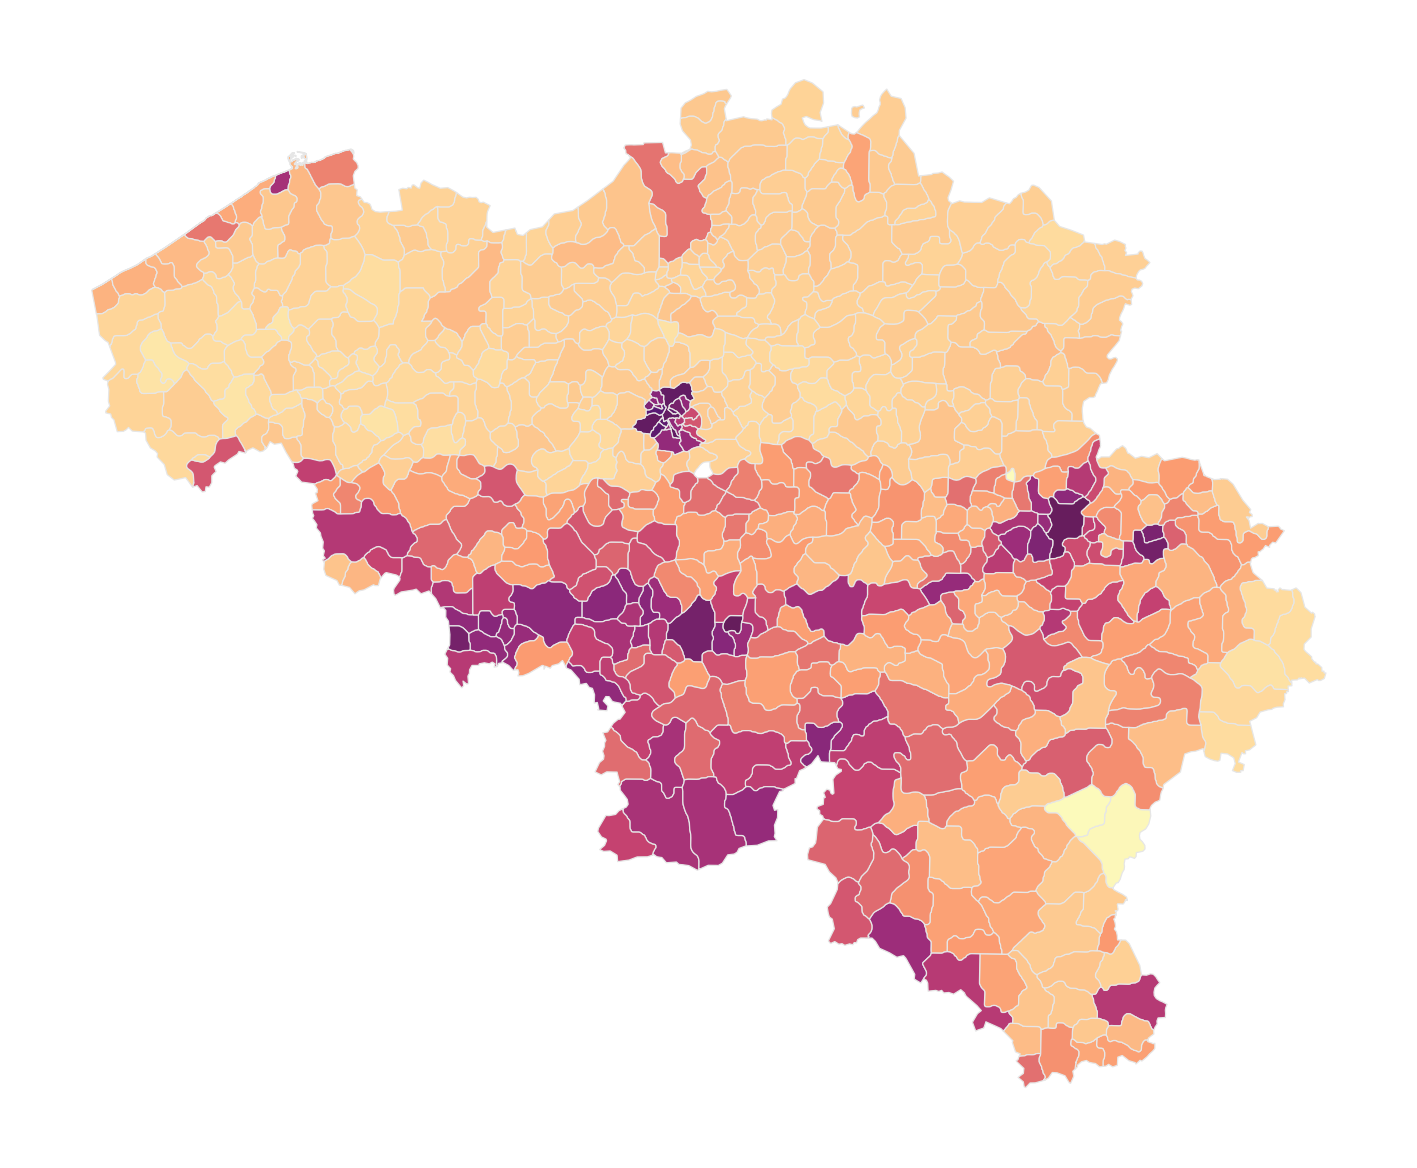

In [18]:
cmap = add_cmap(
    colors=[
        "#FCFCBD",
        "#FED69A",
        "#FDC48C",
        "#FB9A70",
        "#C74370",
        "#9D2D7A",
        "#86277A",
        "#661d5c",
        "#5A1A74",
    ],
    cmap_type="continuous",
    name="Sunset3",
)

fig, ax = plt.subplots(subplot_kw={"projection": projection}, dpi=300)
ax.axis("off")

df.plot(ax=ax, column="Werkloosheidsgraad", cmap=cmap, edgecolor="#e6e6e6", lw=0.3)
plt.show()


## Add barplot

In order to add the barplot, we use the `ax.inset_axes()` function to create a subplot (smaller) that will contain our barplot.

Then we customize it a bit so that it uses the right color scale and looks nice.


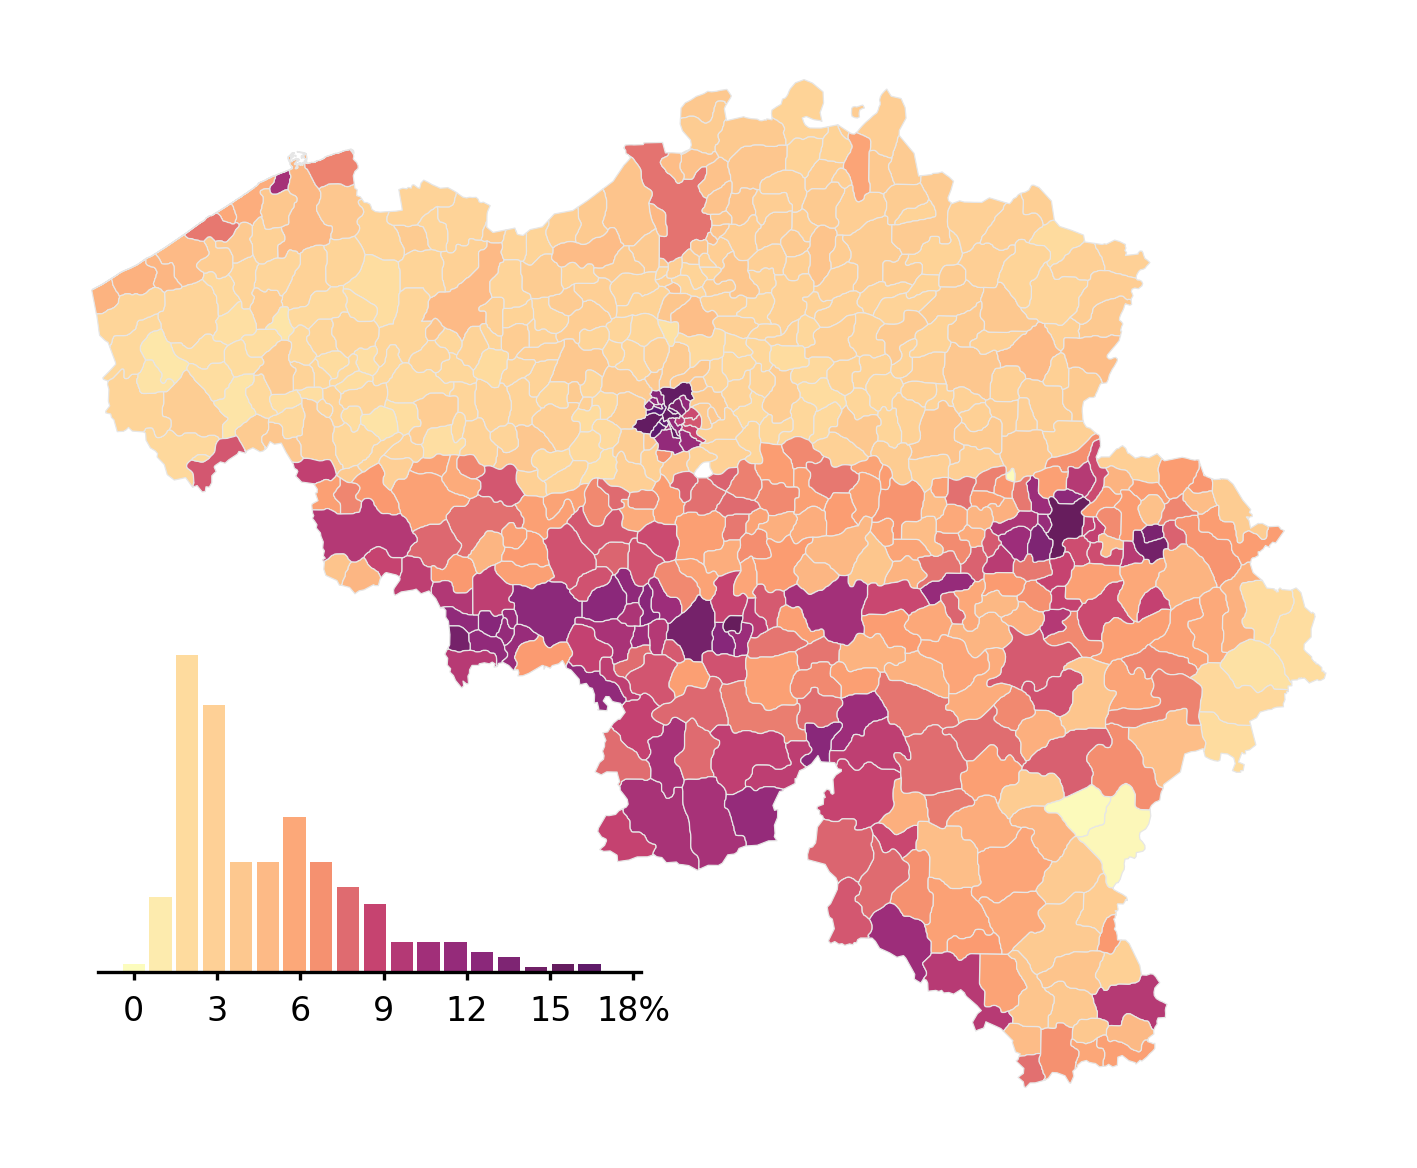

In [ ]:
cmap = add_cmap(
    colors=[
        "#5A1A74",
        "#661d5c",
        "#86277A",
        "#9D2D7A",
        "#C74370",
        "#FB9A70",
        "#FDC48C",
        "#FED69A",
        "#FCFCBD",
    ][::-1],
    cmap_type="continuous",
    name="Sunset3",
)

fig, ax = plt.subplots(subplot_kw={"projection": projection}, dpi=300)
ax.axis("off")

df.plot(ax=ax, column="Werkloosheidsgraad", cmap=cmap, edgecolor="#e6e6e6", lw=0.3)

# Add barplot
bar_ax = ax.inset_axes(bounds=[0.05, 0.15, 0.4, 0.3], zorder=-1)
n, bins, _ = bar_ax.hist(df["Werkloosheidsgraad"], bins=18, alpha=0)
colors = [cmap((val - min(bins)) / (max(bins) - min(bins))) for val in bins]
bar_ax.bar(bins[:-1], n, color=colors)
bar_ax.spines[["top", "left", "right"]].set_visible(False)
bar_ax.set_yticks([])
x_ticks = list(range(0, 19, 3))
bar_ax.set_xticks(x_ticks, labels=["0", "3", "6", "9", "12", "15", "18%"], size=8)
bar_ax.tick_params(axis="x", length=2)

plt.show()


## Add annotations

The final step is to add the annotations: title, subtitle and credit. The steps are:

- load a regular and a bold font thanks to `load_google_font()` from `pyfonts`
- use the `fig.text()` a few times to add the texts at the right places


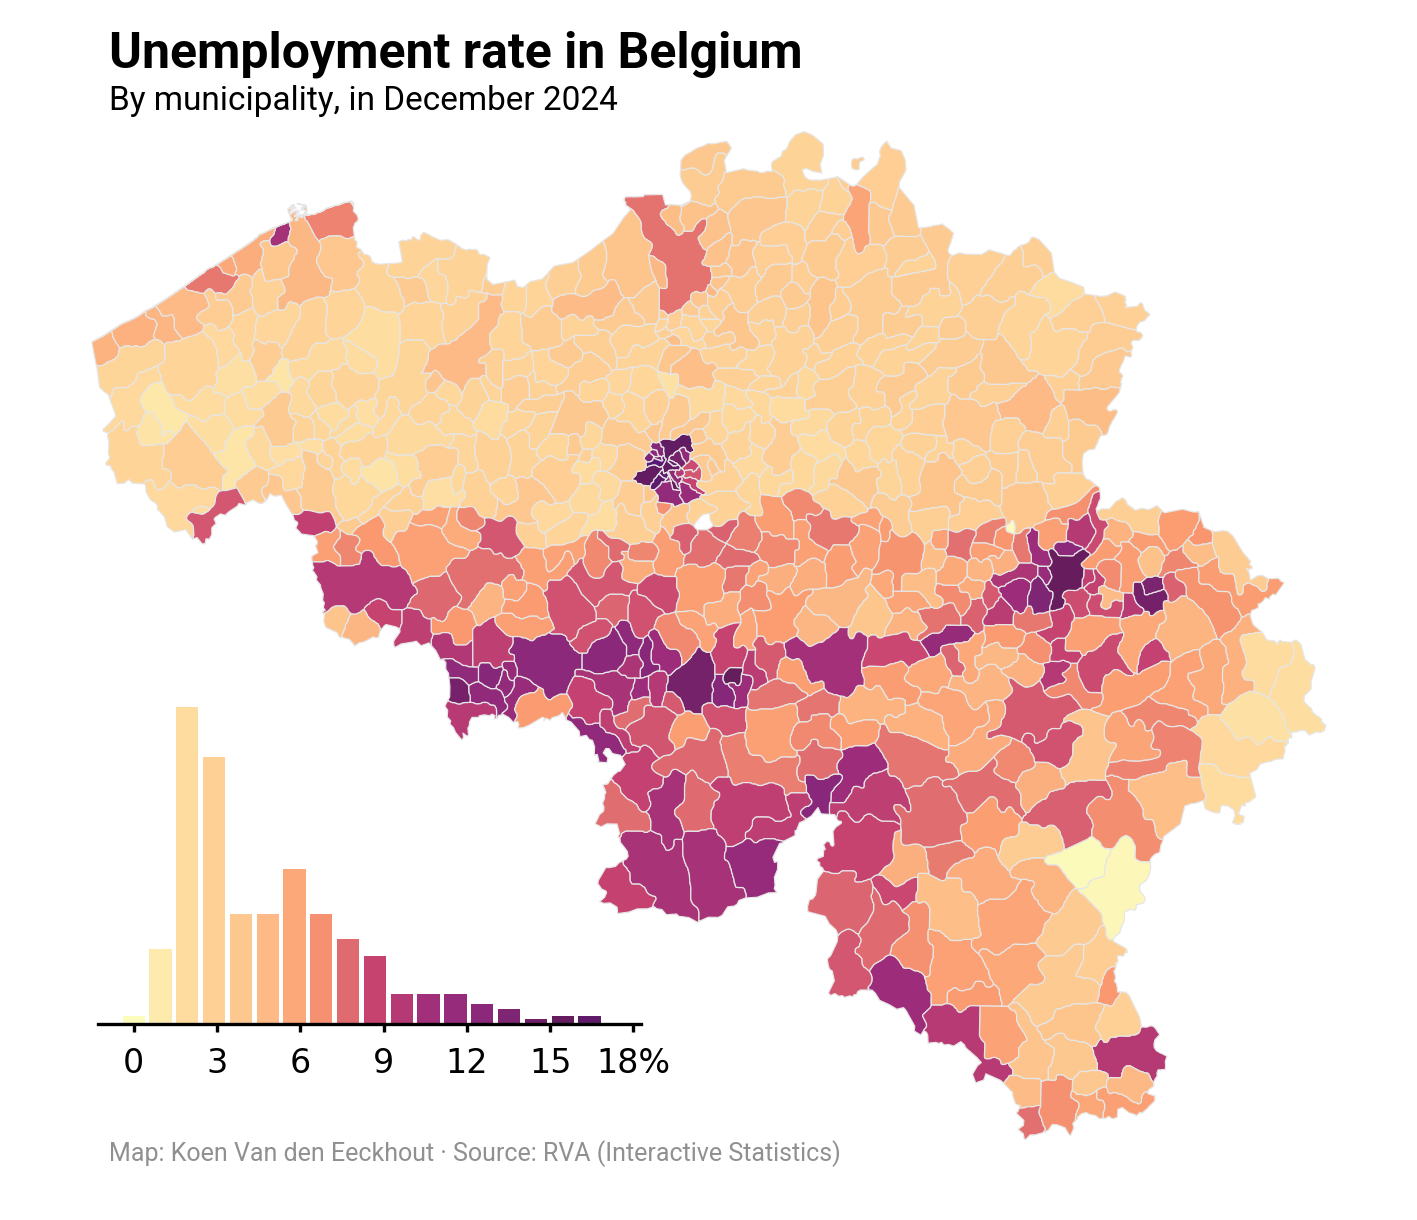

In [17]:
regular = load_google_font("Roboto")
bold = load_google_font("Roboto", weight="bold")

cmap = add_cmap(
    colors=[
        "#5A1A74",
        "#661d5c",
        "#86277A",
        "#9D2D7A",
        "#C74370",
        "#FB9A70",
        "#FDC48C",
        "#FED69A",
        "#FCFCBD",
    ][::-1],
    cmap_type="continuous",
    name="Sunset3",
)

fig, ax = plt.subplots(subplot_kw={"projection": projection}, dpi=300)
ax.axis("off")

df.plot(
    ax=ax,
    column="Werkloosheidsgraad",
    cmap=cmap,
    edgecolor="#e6e6e6",
    lw=0.3,
)

bar_ax = ax.inset_axes(bounds=[0.05, 0.15, 0.4, 0.3], zorder=-1)
n, bins, _ = bar_ax.hist(df["Werkloosheidsgraad"], bins=18, alpha=0)
colors = [cmap((val - min(bins)) / (max(bins) - min(bins))) for val in bins]
bar_ax.bar(bins[:-1], n, color=colors)
bar_ax.spines[["top", "left", "right"]].set_visible(False)
bar_ax.set_yticks([])
x_ticks = list(range(0, 19, 3))
bar_ax.set_xticks(x_ticks, labels=["0", "3", "6", "9", "12", "15", "18%"], size=8)
bar_ax.tick_params(axis="x", length=2)

fig.text(x=0.2, y=0.89, s="Unemployment rate in Belgium", size=12, font=bold)
fig.text(x=0.2, y=0.86, s="By municipality, in December 2024", size=8, font=regular)
fig.text(
    x=0.2,
    y=0.13,
    s="Map: Koen Van den Eeckhout · Source: RVA (Interactive Statistics)",
    size=6,
    color="#909090",
    font=regular,
)

plt.savefig(
    "../../static/graph/web-choropleth-map-with-barplot.png",
    dpi=300,
    bbox_inches="tight",
)

## Going further

You might be interested in:

- the [choropleth map section](/choropleth-map) of the gallery
- this other [choropleth + barplot example](/web-combine-choropleth-map-with-barplot)
- how to create an [interactive choropleth map](/choropleth-map-plotly-python)
